# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

Presentado por Joan Mauricio Yanza Ruiz

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

1)Representar gráficamente la función junto al polinomio de interpolación de Lagrange,  pn(x) , para  n={4,8,12,16,20} .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d

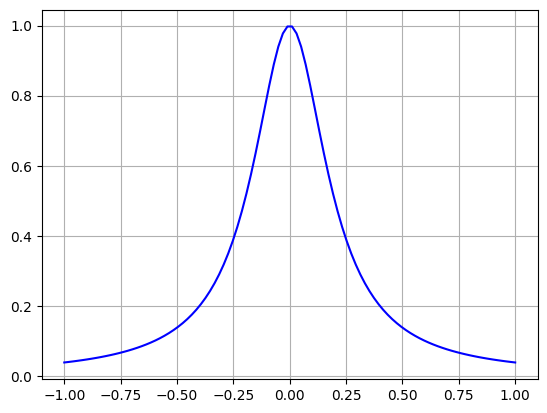

In [3]:
# s grafica la funcion
f = lambda x: 1/(1+25*x**2)
x = np.linspace(-1,1,100)
plt.plot(x,f(x), "b-")
plt.grid()
plt.show();

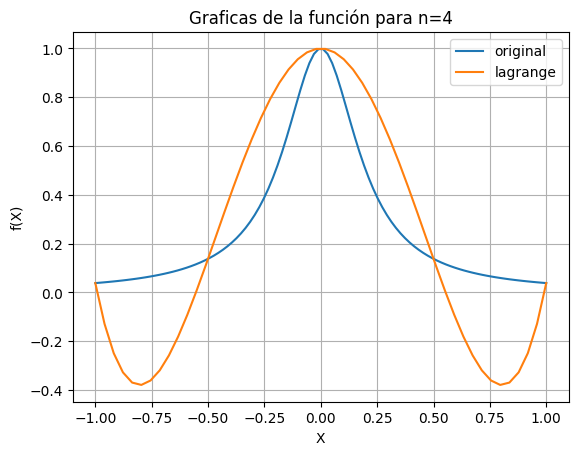

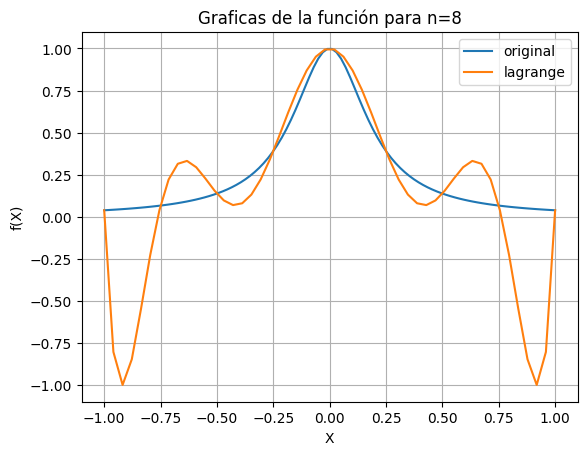

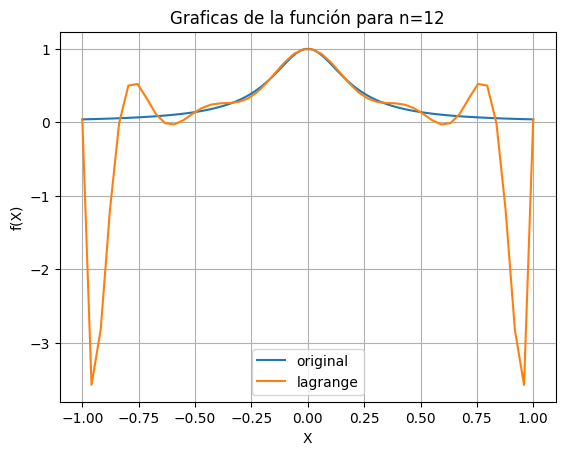

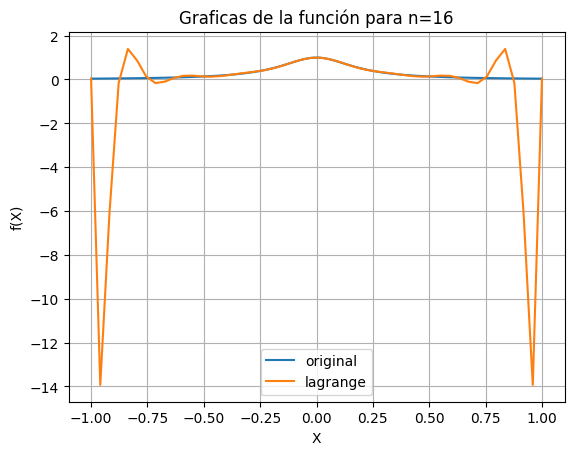

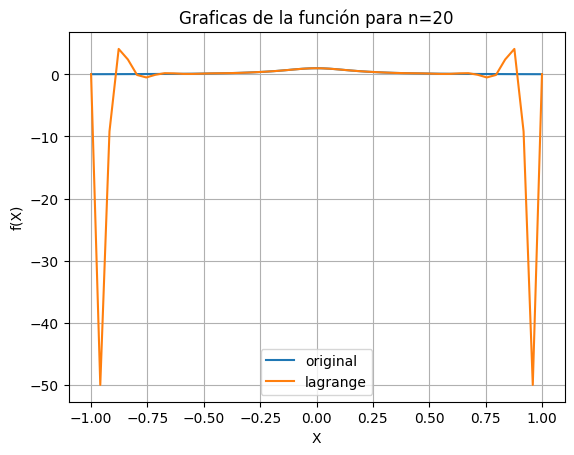

In [4]:
# GRAFICA
#Para  n={4,8,12,16,20} .

for i in range(4,24,4):
  x_= np.linspace(-1,1,i+1)
  pl=lagrange(x_,f(x_))
  xl=np.linspace(np.min(x_),np.max(x_))
  plt.plot(x,f(x),label="original")
  plt.plot(xl,pl(xl),label="lagrange")
  plt.xlabel("X")
  plt.ylabel("f(X)")
  plt.title(f"Graficas de la función para n={i}")
  plt.legend()
  plt.grid()
  plt.show();

Comprobar gráficamente cómo el error aumenta con  n . Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

In [5]:
import sympy as sp

# imprimir en latex
sp.init_printing()

In [6]:
# defino otra funcion
f_s = lambda y : 1/(1+25*y**2)

# y como simbolo
y = sp.symbols("y")

# la expresion
f_s(y)

    1    
─────────
    2    
25⋅y  + 1

In [7]:
# quinta derivada de la funcion f_s
# la funcion primero, y la variable con respecto a quien derivo ,luego  el orden de derivada
df5= sp.diff(f_s(y), y, 5)

In [8]:
# convierto la funcion simbolica en una funcion que maneja arreglo
# entra la variable independiente,la funcion, y numpy para convertirlo en una funcion de numpy

f5 = sp.lambdify(y,df5,"numpy" )

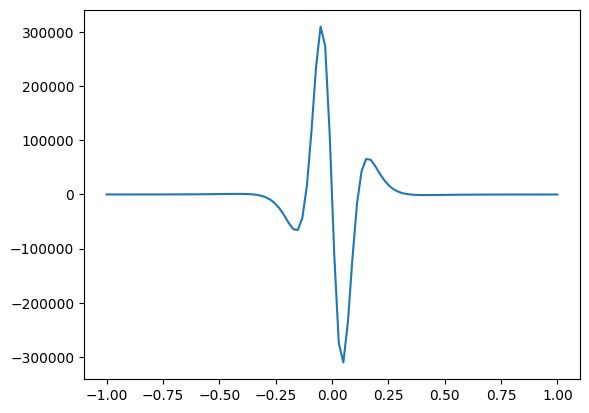

In [9]:
# se grafica la funcion quinta derivada de f llamada f5
# x5 es el dominio
x5 = np.linspace(-1,1,100)

# se grafica la funcion f5
plt.plot(x5,f5(x5))


# vamos a buscar el maximo
x_max5= np.max(abs(f5(x5)))

# se halla el indice donde esta el maximo en la funcion
x_zeta= np.argmax(abs(f5(x5)))

# hallamo zeta
zeta = x5[x_zeta]


In [10]:
import math as mt

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [11]:
n2=4
xt=0.5
xs = np.linspace(-1,1,n2+1)
l=((x_max5/mt.factorial(n2+1)))*(xt-xs[0])*(xt-xs[1])*(xt-xs[2])*(xt-xs[3])*(xt-xs[4])
print(f"La cota de error para n=4 en el punto {xt} es  ",int(l))


La cota de error para n=4 en el punto 0.5 es   0


Comprobar gráficamente cómo el error aumenta con  n . Emplee la libreria, simbolica de sympy y encuente el error en la interpolación

310353.0279713794
10461710.779253267
335525051.7067462


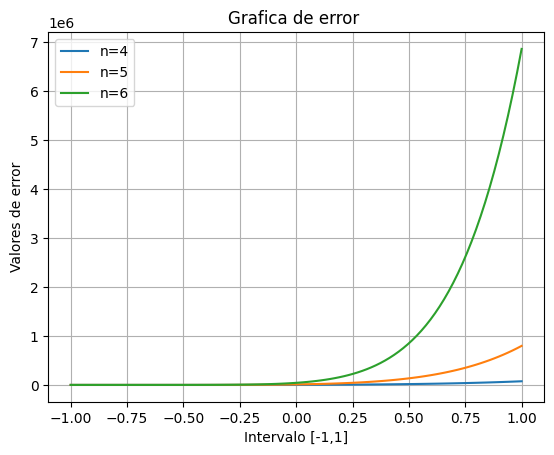

In [12]:
for n in range(4,7,1):
  df5= sp.diff(f_s(y), y, n+1)
  f5 = sp.lambdify(y,df5,"numpy" )
  x5 = np.linspace(-1,1,100)

# se grafica la funcion f5
  #plt.plot(x5,f5(x5))


# vamos a buscar el maximo
  x_max5= np.max(abs(f5(x5)))

# se halla el indice donde esta el maximo en la funcion
  x_zeta= np.argmax(abs(f5(x5)))

# hallamo zeta
  zeta = x5[x_zeta]
  k=1
  for i in range(0,n+1,1):
    xt=np.linspace(-1,1,100)

    e = k* (xt-xt[i])
    k=e
  plt.plot(xt,(x_max5/(mt.factorial(n+1)))*e, label=f"n={n}")
  plt.title("Grafica de error ")
  plt.xlabel("Intervalo [-1,1]")
  plt.ylabel("Valores de error")
  plt.legend()
  plt.grid()
  print(x_max5)

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

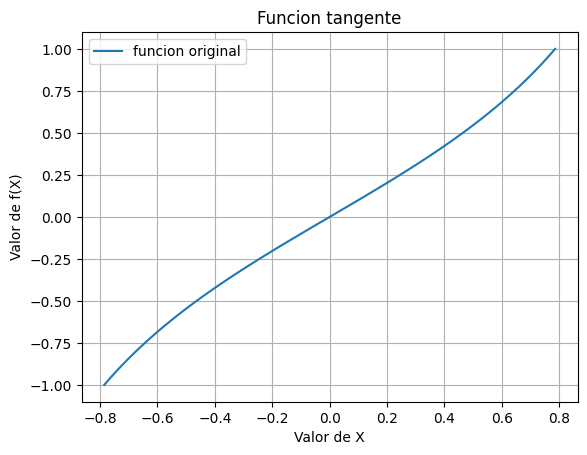

In [13]:
# defino funcion
f = lambda x : np.tan(x)

# defino dominio

x =np.linspace((-np.pi/4),(np.pi/4),100)

# grafica
plt.plot(x,f(x), label="funcion original")
plt.xlabel("Valor de X")
plt.ylabel("Valor de f(X)")
plt.title("Funcion tangente")
plt.grid()
plt.legend()
plt.show();

In [14]:
N=9 #
n=N+1
x_=np.linspace(-1,1,n)
pl=lagrange(x_,f(x_))
xl=np.linspace(np.min(x_),np.max(x_))

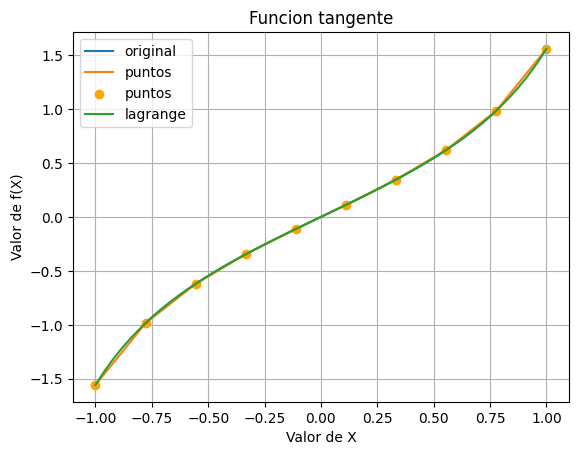

In [15]:
plt.plot(x,f(x),label="original")
plt.plot(x_,f(x_),label="puntos")
plt.scatter(x_,f(x_),label="puntos", color="orange")
plt.xlabel("Valor de X")
plt.ylabel("Valor de f(X)")
plt.title("Funcion tangente")
plt.plot(xl,pl(xl),label="lagrange")
plt.legend()
plt.grid()

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


In [16]:
df = pd.DataFrame()
df["Valores de x "] = np.array([1, 1.3, 1.6, 1.9, 2.2])
df["Valores de f(x) "] =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
df

,Valores de x,Valores de f(x)
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


In [17]:
inter = lagrange(df["Valores de x "],df["Valores de f(x) "] )
new_x_range = np.arange(1.1, 2.1, 0.1)

valores_intermedios = inter(new_x_range )

df2 = pd.DataFrame()
df2["Valores de X a interpolar"] = new_x_range
df2["Valores de f(x) en  interpolación de lagrange"] = valores_intermedios
df2

,Valores de X a interpolar,Valores de f(x) en interpolación de lagrange
0,1.1,0.719646
1,1.2,0.671148
2,1.3,0.620086
3,1.4,0.566846
4,1.5,0.511820
5,1.6,0.455402
6,1.7,0.397993
7,1.8,0.339995
8,1.9,0.281819
9,2.0,0.223875


b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

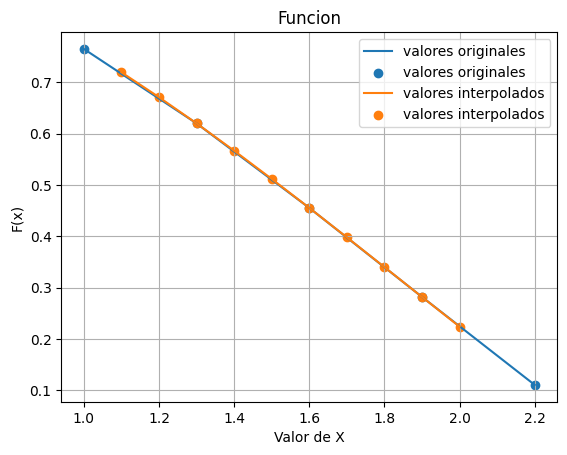

In [18]:
plt.plot(df["Valores de x "],df["Valores de f(x) "], label="valores originales" )
plt.scatter(df["Valores de x "],df["Valores de f(x) "], label="valores originales" )
plt.plot(new_x_range,valores_intermedios, label="valores interpolados")
plt.scatter(new_x_range,valores_intermedios, label="valores interpolados")
plt.xlabel("Valor de X")
plt.ylabel("F(x)")
plt.title("Funcion")
plt.legend()
plt.grid()

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia

,Valores de X a interpolar,Valores de f(x) en interpolación de lagrange,Valores de f(x) en interpolación lineal
0,1.1,0.719646,0.716827
1,1.2,0.671148,0.668457
2,1.3,0.620086,0.620086
3,1.4,0.566846,0.565191
4,1.5,0.511820,0.510297
5,1.6,0.455402,0.455402
6,1.7,0.397993,0.397541
7,1.8,0.339995,0.339680
8,1.9,0.281819,0.281819
9,2.0,0.223875,0.224666


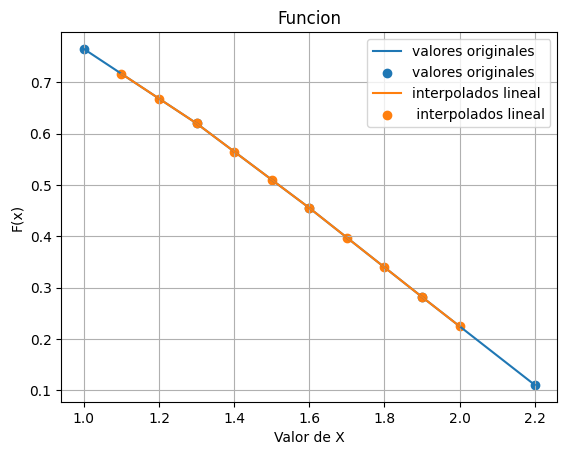

In [19]:
# USO La Interpolacion lineal
y_interp = interp1d(df["Valores de x "],df["Valores de f(x) "])


valores_intermedios_l= y_interp(new_x_range )



df2["Valores de f(x) en  interpolación lineal"] = valores_intermedios_l

plt.plot(df["Valores de x "],df["Valores de f(x) "], label="valores originales" )
plt.scatter(df["Valores de x "],df["Valores de f(x) "], label="valores originales" )
plt.plot(new_x_range,y_interp(new_x_range), label="interpolados lineal")
plt.scatter(new_x_range,y_interp(new_x_range), label=" interpolados lineal")
plt.xlabel("Valor de X")
plt.ylabel("F(x)")
plt.title("Funcion")
plt.legend()
plt.grid()

df2

Se observa que hay una pequeña diferencia entre los valores obtenidos por interpolacion lineal y de lagrange como se muestra en la tabla, no es visible en la grafica

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

Representar gráficamente la imagen, usando las órdenes imread e imshow de python (estas órdenes están contenidas en el paquete matplotlib)

In [20]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import urllib.request

pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

Definir una lista de puntos,  xi , yi  de la paloma.

In [21]:
xi=np.array([0.9,1.3,1.9,2.1,2.6,3,3.9,4.4,4.7,5.0,6.0,7.0,8,9.2,10.5,11.3,11.6,12,12.6,13,13.3])


In [22]:
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

In [23]:
df3=pd.DataFrame()
df3["Xi"] = xi
df3["Yi"] = y
df3

,Xi,Yi
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60
5,3.0,2.70
6,3.9,2.40
7,4.4,2.15
8,4.7,2.05
9,5.0,2.10


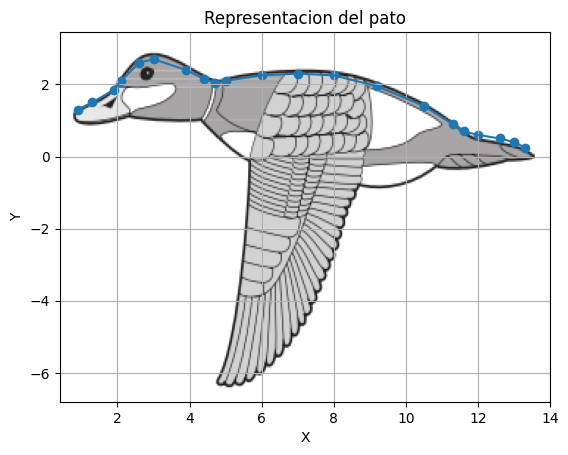

In [24]:
plt.figure()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Representacion del pato")
plt.scatter(xi,y)
plt.plot(xi,y)
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.45))# en eje x va de 0.4 a 14 en eje y va de -6.8 a3.45
plt.grid()

Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

In [25]:
pol = lagrange(xi,y)
t = np.linspace(0.9,13.3,100)


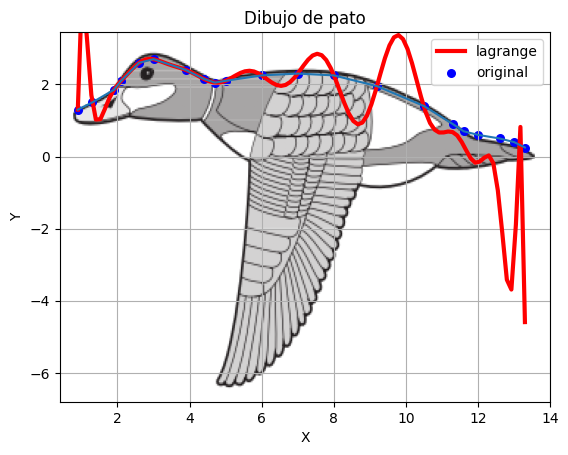

In [30]:
plt.plot(t,pol(t),color="red",label="lagrange",lw=3)
plt.scatter(xi,y,color="blue",label="original",s=30)
plt.plot(xi,y)
plt.grid()
plt.title("Dibujo de pato")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.45))# en eje x va de 0.4 a 14 en eje y va de -6.8 a3.45
plt.show();

Repetir el proceso de interpolación mediante splines cúbicos. Para ello, utilizar la función CubicSpline (contenida en scipy.interpolate),

In [27]:
from scipy.interpolate import CubicSpline

In [28]:
cs = CubicSpline(xi, y)

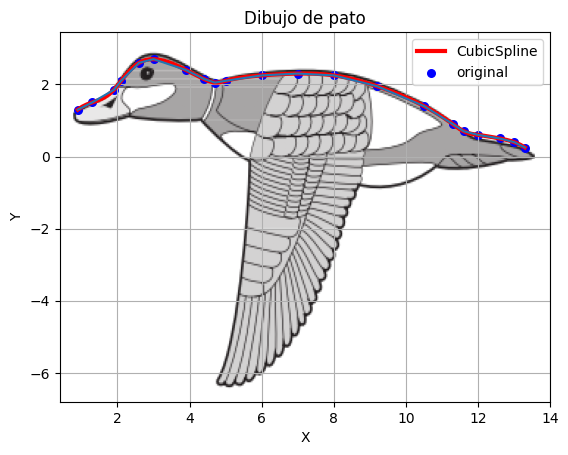

In [29]:
plt.plot(t,cs(t),color="red",label="CubicSpline",lw=3)
plt.scatter(xi,y,color="blue",label="original",s=30)
plt.plot(xi,y)
plt.grid()
plt.title("Dibujo de pato")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.imshow(imagen_pato,extent=(0.4,14,-6.8,3.45))# en eje x va de 0.4 a 14 en eje y va de -6.8 a3.45
plt.show();

Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

En la  interpolacion de Lagrange se presentan oscilaciones ya que se utilizan polinomios de grado elevado que determinan una curva que trata de pasar por todos los puntos. Esto garantiza la presencia de muchas y grandes oscilaciones en comparacion con el metodo de CubicSpline